In [18]:
%matplotlib inline
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set() 

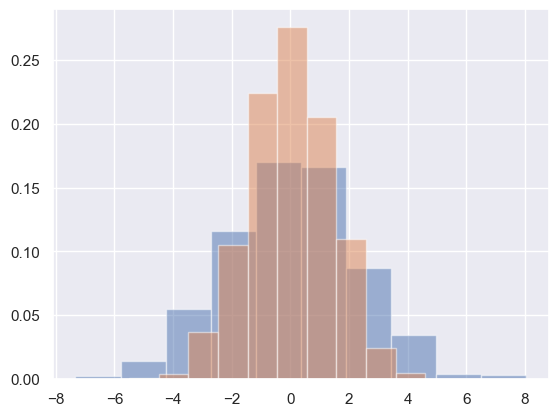

In [2]:
# seaborn is made for pandas dataframes as well as better looking plots with less boilerplate code
# seaborn uses matplotlib under the hood but makes it easier to use
# histograms, KDE, and densities
# joint distributions are straightforward in MPL
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000) # 2D normal distribution
data = pd.DataFrame(data, columns=['x', 'y']) # convert to pandas dataframe

for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5) # alpha is transparency

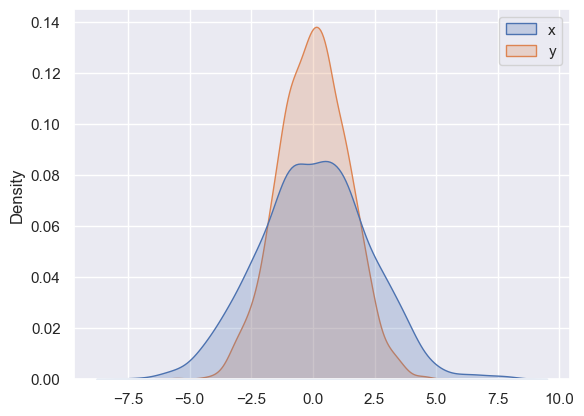

In [5]:
# we can get a smoother estimate using kernel density estimation (KDE) which seaborn does with sns.kdeplot
sns.kdeplot(data=data, fill=True); # shade fills in the area under the curve

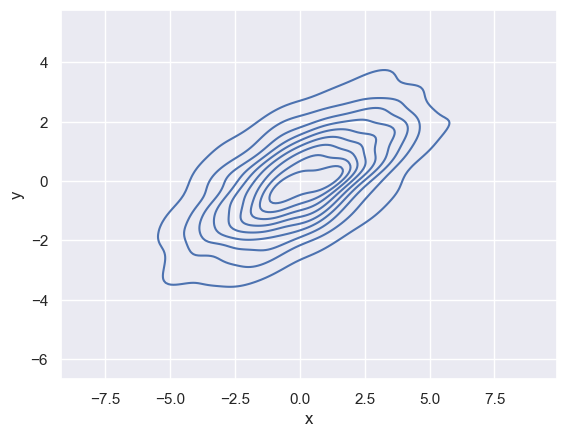

In [6]:
# if we pass x and y columns to kdeplot, we get a 2D visualization of the joint density
sns.kdeplot(data=data, x='x', y='y');

In [7]:
# pair plots
# when you generalize joint plots to datasets of larger dimensions, you end up with pair plots
# these are very useful for exploring correlations between multidimensional data, when you'd like to plot all pairs of values against each other
iris = sns.load_dataset('iris') # load iris dataset
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


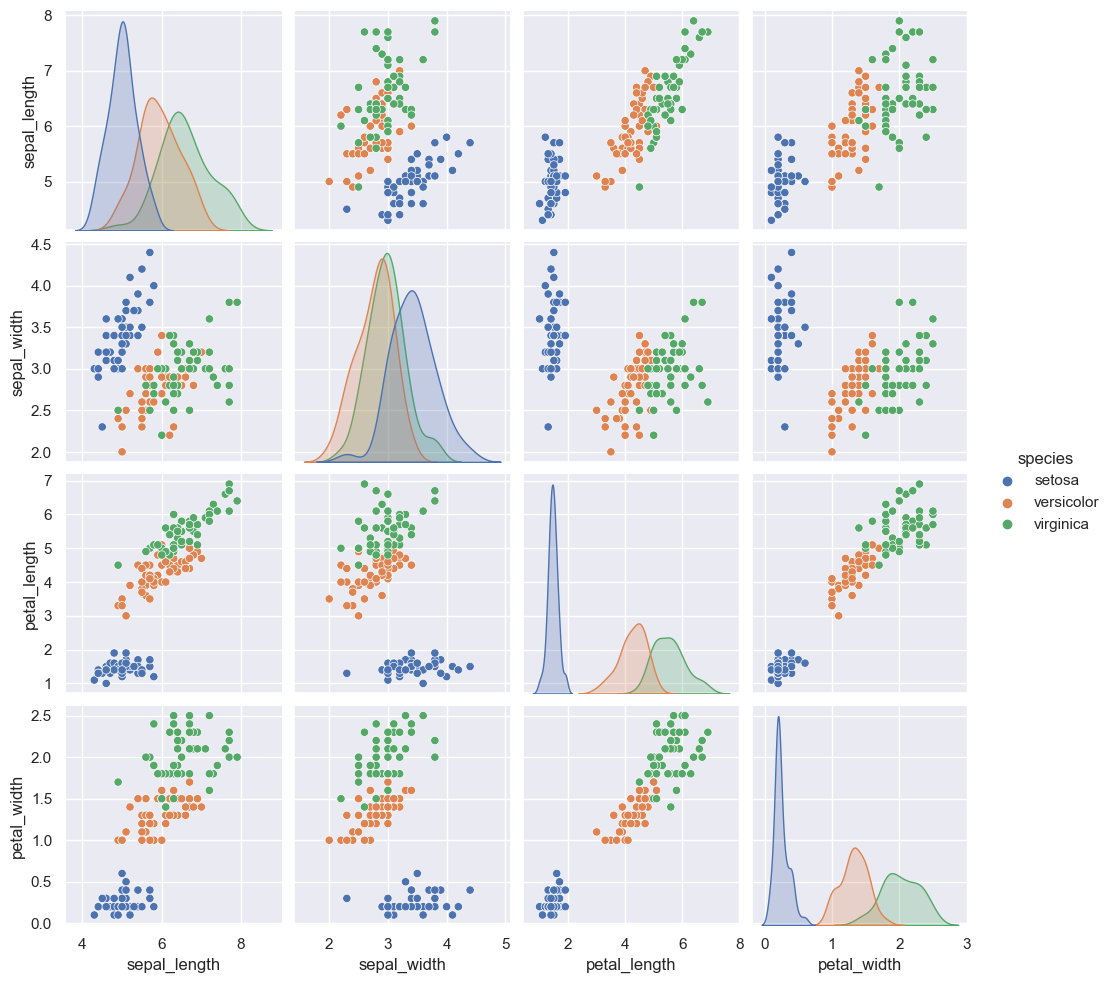

In [8]:
# visualizing the multidimensional relationships among the samples is as easy as calling sns.pairplot
sns.pairplot(iris, hue='species', height=2.5); # hue is the column to map plot aspects to different colors

In [9]:
# Faceted histograms
# sometimes the best way to view data is via histograms of subsets
# seaborn's FacetGrid makes this extremely simple we will take a look at some data that shows the amount that restaurant staff receive in tips based on various indicator data the restuarant staff data used divides employees into two sexes 
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


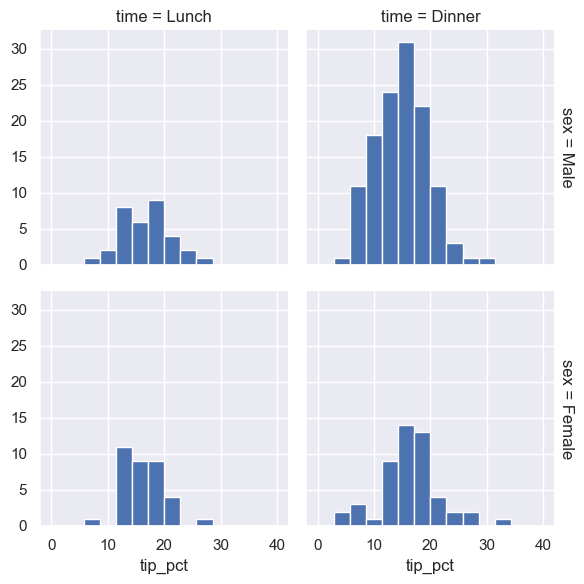

In [10]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill'] # add tip percentage column

grid = sns.FacetGrid(tips, row='sex', col='time', margin_titles=True) # create FacetGrid object
grid.map(plt.hist, 'tip_pct', bins=np.linspace(0, 40, 15)); # map histogram to grid

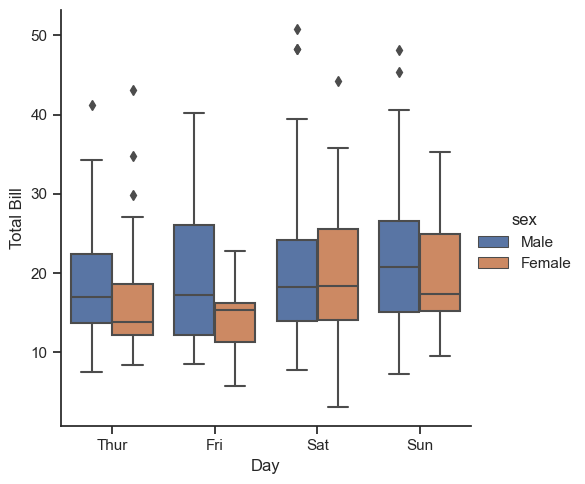

In [11]:
# categorical plots
# categorical plots can be useful for this kind of visualization as well these allow you to view the distribution of a parameter within bins defined by any other parameter
with sns.axes_style(style='ticks'):
    g = sns.catplot(x='day', y='total_bill', hue='sex', data=tips, kind='box')
    g.set_axis_labels('Day', 'Total Bill');

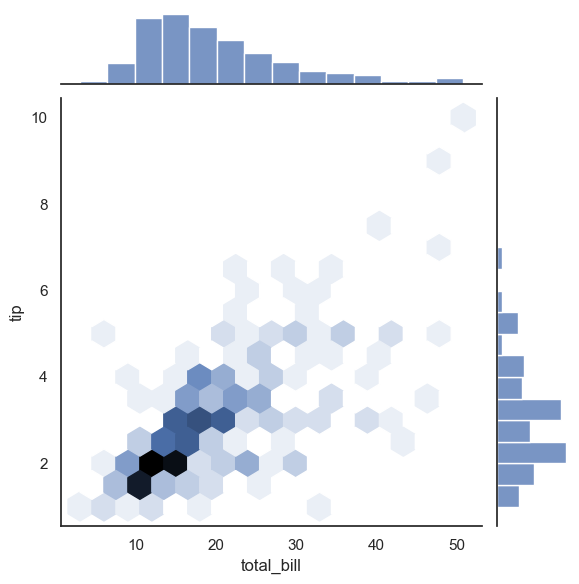

In [12]:
# joint distributions
# similar to the pairplot we saw before we can use sns.jointplot to show the joint distribution between different datasets along with the associated marginal distributions
with sns.axes_style('white'):
    sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')

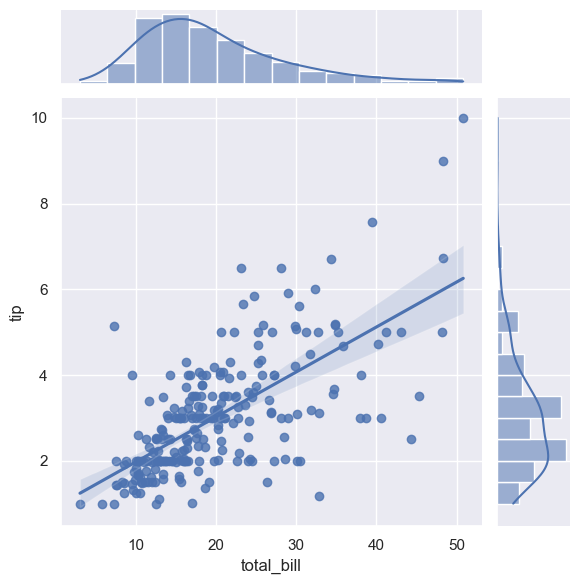

In [13]:
# the joint plot can even do some automatic kernel density estimation and regression
sns.jointplot(x="total_bill", y="tip", data=tips, kind='reg');

In [14]:
# time series can be plotted using sns.factorplot 
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


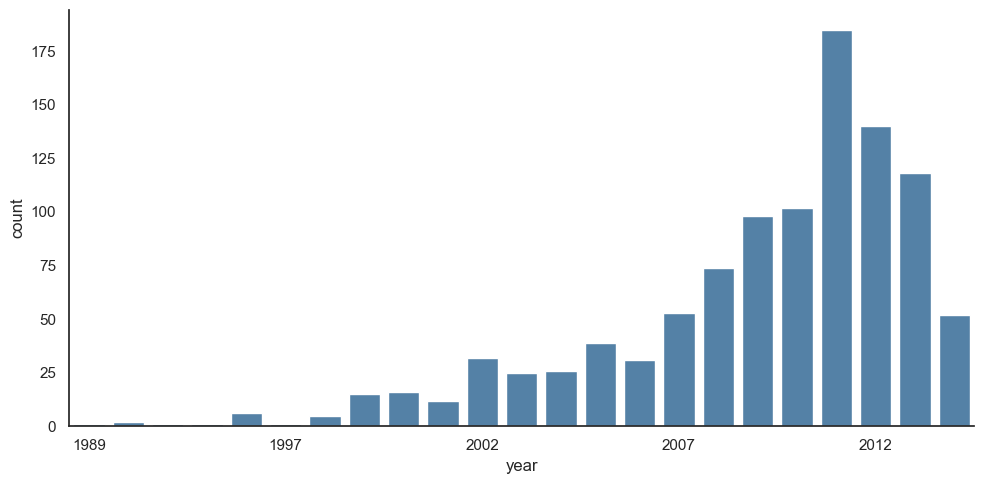

In [15]:
with sns.axes_style('white'):
    g = sns.catplot(x='year', data=planets, aspect=2, kind='count', color='steelblue')
    g.set_xticklabels(step=5)

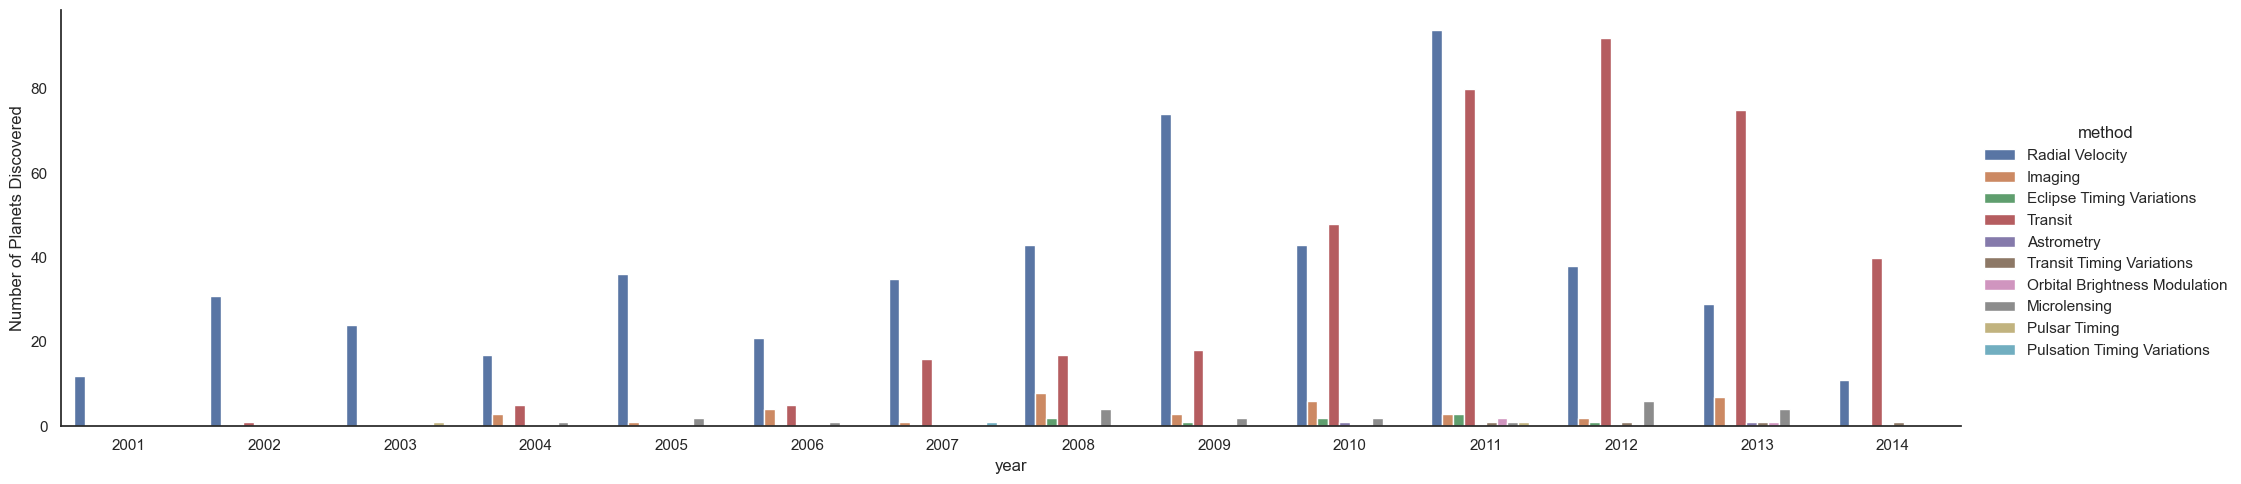

In [16]:
# we can learn more by looking at the method of discovery of each of these planets
with sns.axes_style('white'):
    g = sns.catplot(x='year', data=planets, aspect=4.0, kind='count', hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

In [17]:
data = pd.read_csv('Data/marathon-data.csv')
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [19]:
# pandas loaded the time columns as python strings we cna see this by looking at the dtypes attribute
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [20]:
# lets provide a converter for the times
def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)

data = pd.read_csv('Data/marathon-data.csv', converters={'split':convert_time, 'final':convert_time})
data.head()

,age,gender,split,final
0,33,M,0 days 01:05:38,0 days 02:08:51
1,32,M,0 days 01:06:26,0 days 02:09:28
2,31,M,0 days 01:06:49,0 days 02:10:42
3,38,M,0 days 01:06:16,0 days 02:13:45
4,31,M,0 days 01:06:32,0 days 02:13:59


In [21]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [22]:
# this will make it esier to manipulate the temporal data for the purpose of our seaborn plotting utilities
# we next add columns that give the time in seconds for easier plotting
data['split_sec'] = data['split'].astype(int) / 1E9
data['final_sec'] = data['final'].astype(int) / 1E9
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0


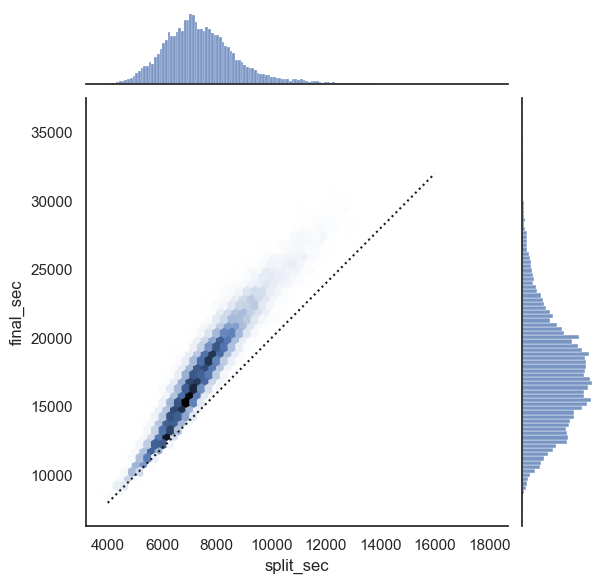

In [23]:
with sns.axes_style('white'):
    g = sns.jointplot(x='split_sec', y='final_sec', data=data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000), np.linspace(8000, 32000), ':k')

In [24]:
# the dotted line shows where someone's time would lie if they ran the marathon at a perfectly steady pace
# the points above the line represent people who slowed down during the race 
# we next create another column in the data the split fraction which measures the degree to which each runner negative splits or positive splits the race
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842


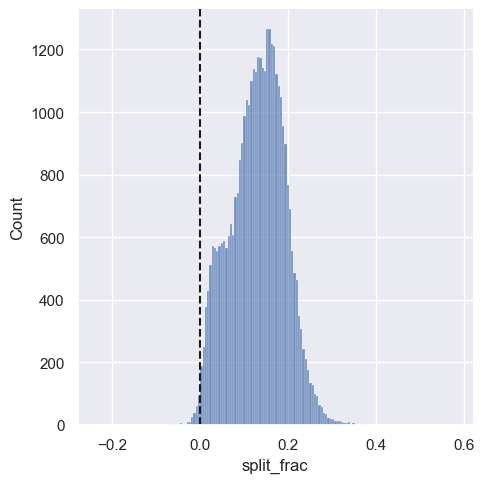

In [26]:
# where this split difference is less than zero the person negative-split the race by that fraction
# lets do a distribution plot of this split fraction
sns.displot(data['split_frac'], kde=False)
plt.axvline(0, color='k', linestyle='--');

In [27]:
sum(data.split_frac < 0)

251

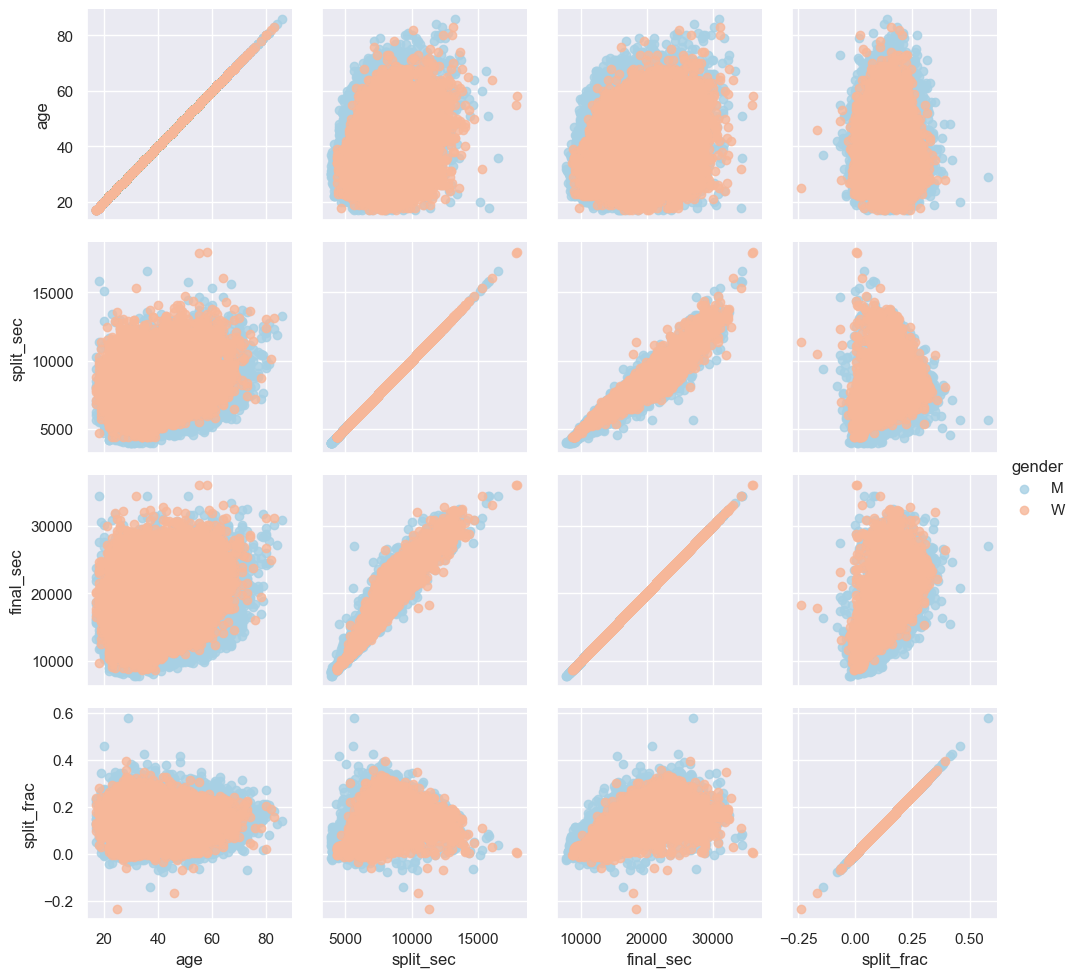

In [28]:
# out of 40,000 participants only 2500 ran the second half faster than the first half 
# lets see whether there is any correlation between this split fraction and other variables
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'], hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

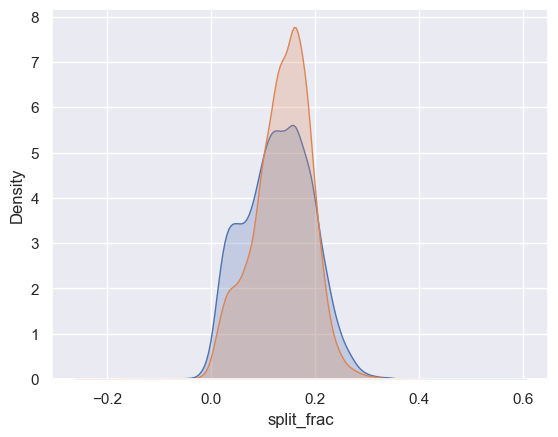

In [29]:
# it looks like the split fraction does not correlate particularly with age, but it does correlate with the final time faster runners tend to have closer to even splits on their marathon time
# we can zoom in on the histogram of split fractions seperated by gender
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', fill=True)
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', fill=True)
plt.xlabel('split_frac');

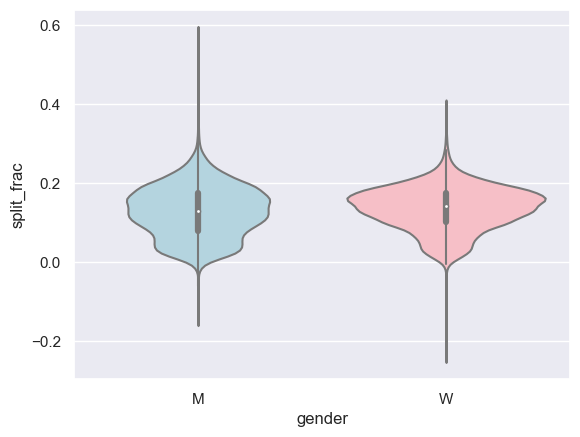

In [30]:
# there are many more men than women that are running close to an even split it almost looks like a bimodal distribution among the men and women. lets see if we can suss out what's going on by looking at the distributions as a function of age using a violin plot
sns.violinplot(x='gender', y='split_frac', data=data, palette=['lightblue', 'lightpink']);

In [31]:
# we can create a new column in the array that specifies the age range that each person is in, by decade
data['age_dec'] = data.age.map(lambda age: 10 * (age // 10))
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097,30
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842,30


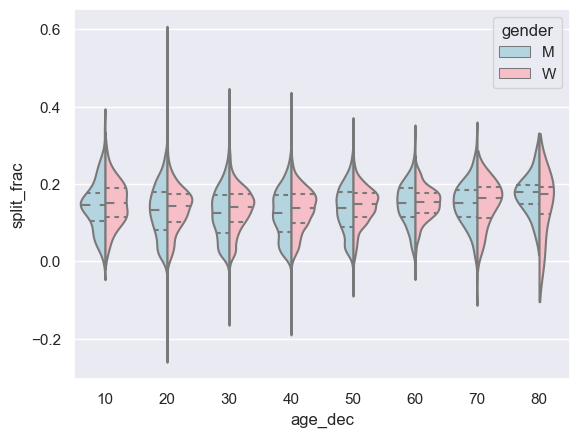

In [32]:
men = (data.gender == 'M')
women = (data.gender == 'W')

with sns.axes_style(style=None):
    sns.violinplot(x='age_dec', y='split_frac', hue='gender', data=data, split=True, inner='quartile', palette=['lightblue', 'lightpink']);

In [33]:
# we can see where the distibutions among men and women differ the split distributions of men in their 20s to 50s show a pronounced overdensity toward lower splits when compared to women of the same age
# also suprisingly, it appears that the 80 year old women seem to outperform everyone in terms of their split time although this is likely a small number effect, as there are only a handfull of runners in that range
(data.age > 80).sum()

7

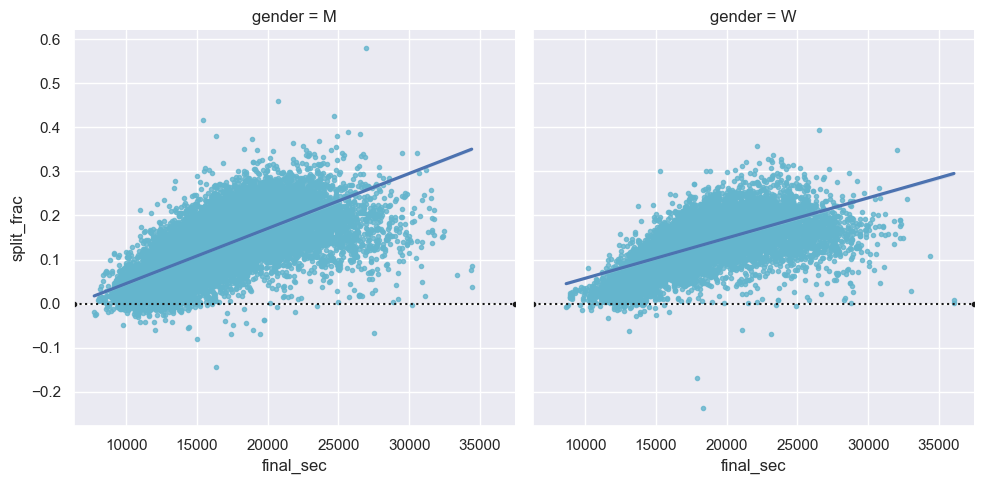

In [35]:
# back to men with negative splits: who are these runners? does this split fraction correlate with finishing quickly? we can plot this very easily we'll use regplot which will automatically fit a linear regression to the data
g = sns.lmplot(x='final_sec', y='split_frac', col='gender', data=data, markers='.', scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.0, color='k', ls=':');
# among both men and women, the people with fast splits tend to be faster runners who are finishing in about 4 hours people slower than that tend to have a longer second split time